In [1]:
from scripts.halo_analysis_scripts import *
%matplotlib inline

palettable colormaps are not installed


In [75]:
def plot_mass_fraction(particle_types_num=[0], flabel='gas', ylim=(-2.0,1.0), legendFlag=True, particle_types=[0,1,2,4,5], zbinwidth = 0.5, rbins=np.power(10, np.arange(np.log10(0.005258639741921723), np.log10(3), 0.05))):
    rmid = (rbins[:-1]+rbins[1:])/2 #in units of Rvir
    
    fig, axes = plt.subplots(1, 5, sharex=True, sharey='row', gridspec_kw={'wspace': .05, 'hspace':.03}, figsize=[4.8*5,4.8*1], dpi=150, facecolor='w')
    cmaps = {'h206':plt.cm.Blues, 'h29':plt.cm.Greens, 'h113':plt.cm.Reds, 'h2':plt.cm.Purples}
    indices = {'h206':0, 'h29':1, 'h113':2, 'h2':3}

    for halo, snapdir in Quest_sims['nofb'].items():
        cmap = cmaps[halo]
        simname = os.path.basename(snapdir)
        allprofiles = h5todict(f'data/{simname}_allprofiles_widezbins.h5')

        cosmological_baryon_budget = read_param_file(snapdir)['OmegaBaryon']/read_param_file(snapdir)['Omega0']

        for z0, c in zip( sorted(allprofiles.keys()), cmap(np.linspace(0.1,1,len(allprofiles.keys())))[::-1] ):
            fbarr = []
            for k in allprofiles[z0].keys():
                totmass = np.sum( [allprofiles[z0][k][f'PartType{ptype}'] for ptype in particle_types], axis=0 )
                nummass = np.sum( [allprofiles[z0][k][f'PartType{ptype}'] for ptype in particle_types_num], axis=0 )
                with np.errstate(all='ignore'): fb = np.cumsum(nummass)/np.cumsum(totmass)/cosmological_baryon_budget
                fbarr.append(fb)
            z0n = float(z0.split('z0_')[1])
            axes[indices[halo]+1].plot(np.log10(allprofiles[z0][k]['rmid']), np.log10(np.median(fbarr, axis=0)), c=c, label=f'z=[{z0n},{z0n+zbinwidth})')
            axes[0].plot(np.log10(rmid), np.log10(np.median(fbarr, axis=0)), c=c)
            assert np.array_equal(allprofiles[z0][k]['rmid'], rmid)

        if legendFlag: axes[indices[halo]+1].legend(loc=4)
        axes[indices[halo]+1].set_title(simname)

    for ax in axes: ax.axhline(0, ls='--', c='k', zorder=-1)
    for ax in axes: ax.set_xlabel(r'$\log (r/R_{vir})$')
    axes[0].set_ylabel(f'$\log f_{{{flabel}}}/(\Omega_b / \Omega_m)$')
    axes[0].set_ylim(ylim)

/tmp/ipykernel_21682/431126959.py:23: RuntimeWarning: divide by zero encountered in log10
  axes[indices[halo]+1].plot(np.log10(allprofiles[z0][k]['rmid']), np.log10(np.median(fbarr, axis=0)), c=c, label=f'z=[{z0n},{z0n+zbinwidth})')
/tmp/ipykernel_21682/431126959.py:24: RuntimeWarning: divide by zero encountered in log10
  axes[0].plot(np.log10(rmid), np.log10(np.median(fbarr, axis=0)), c=c)


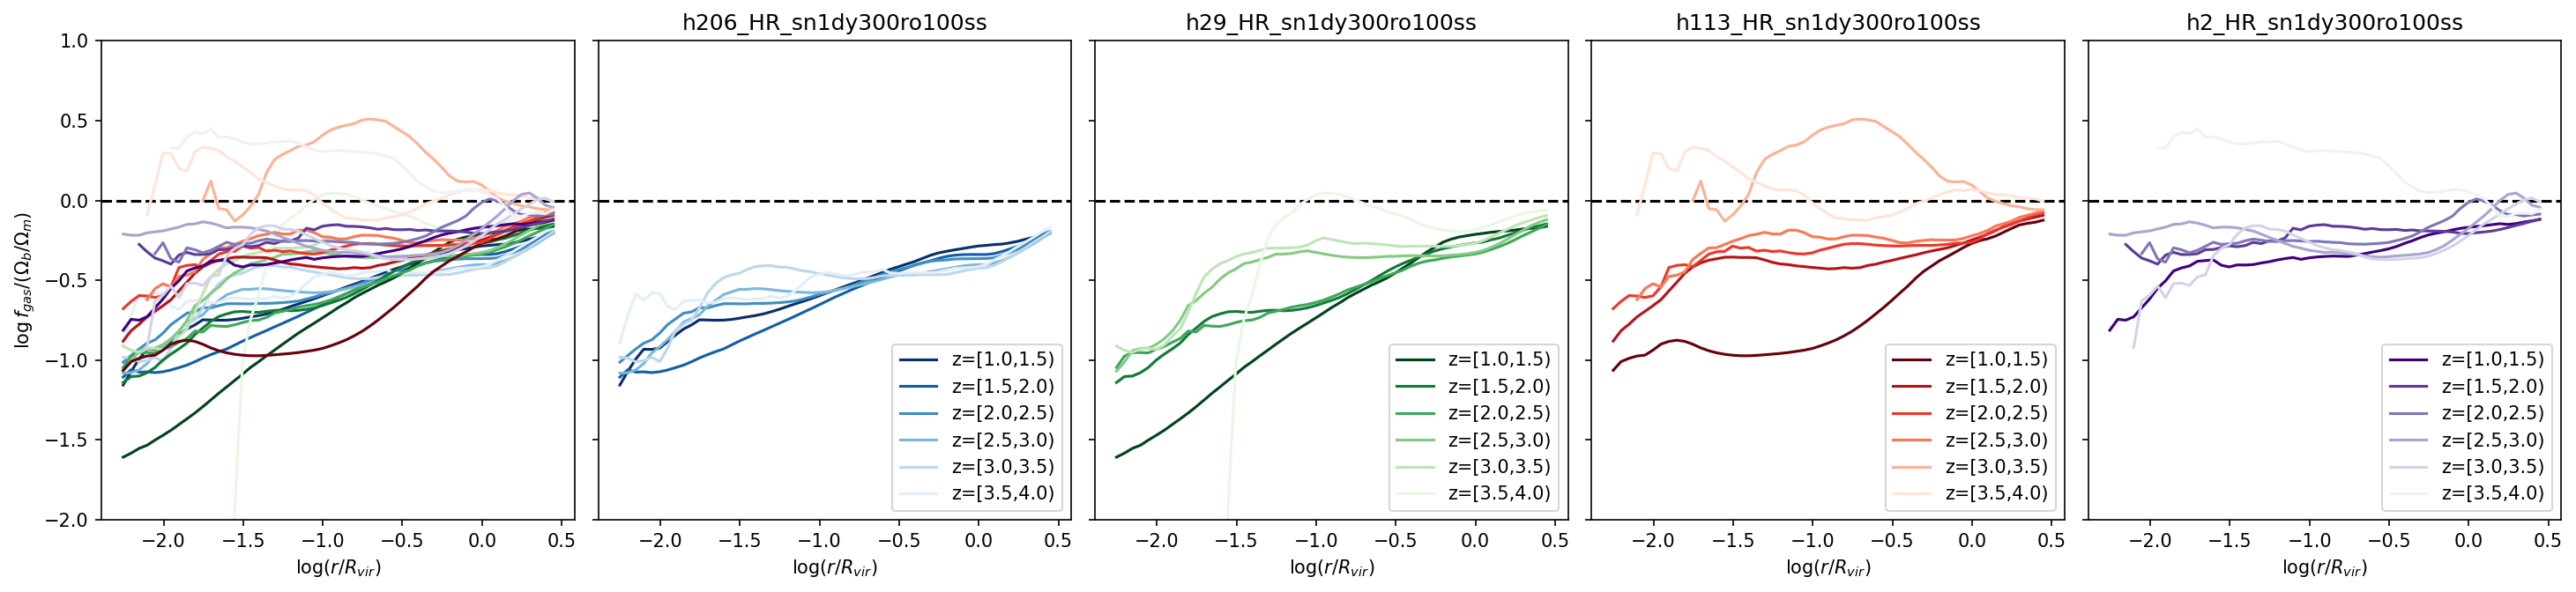

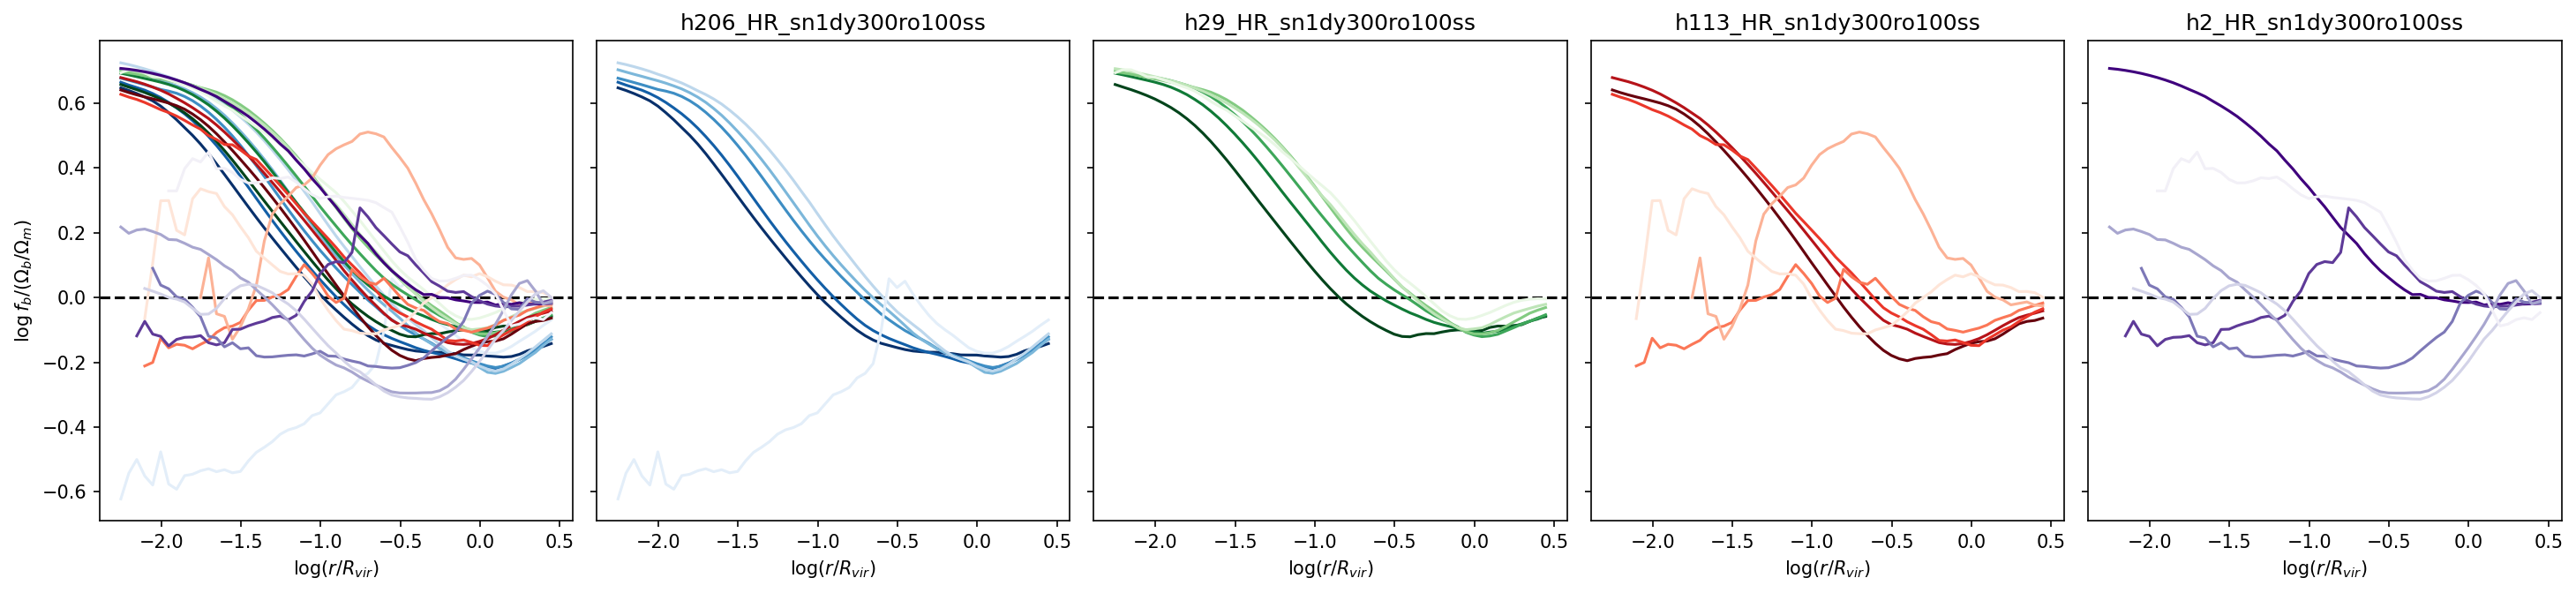

In [76]:
plot_mass_fraction()
plot_mass_fraction([0,4], 'b', None, False)

In [2]:
halos = sorted([f.split('_allprofiles_widezbins.h5')[0] for f in os.listdir('data') if 'allprofiles_widezbins.h5' in f])

Text(0, 0.5, '$\\log f_{b}/(\\Omega_b / \\Omega_m)$')

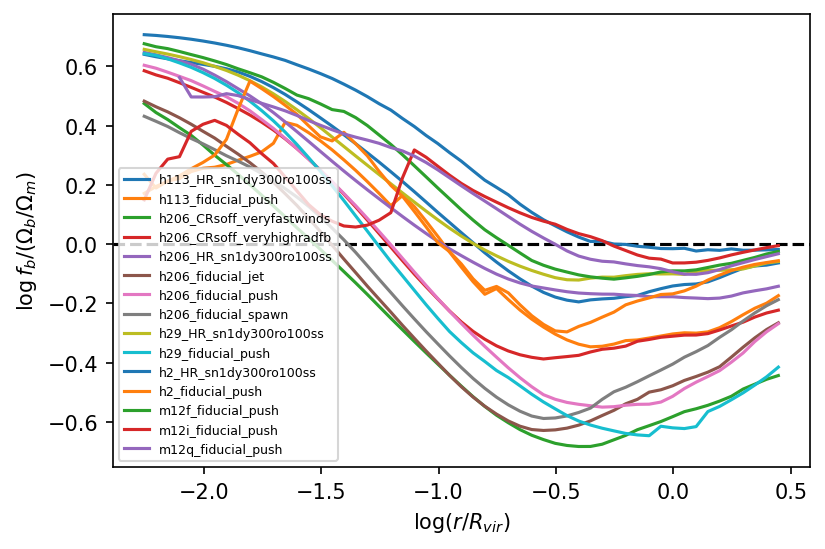

In [3]:
z0 = 'z0_1.0'
particle_types_num=[0,4]
particle_types=[0,1,2,4,5]
flabel = 'b'

plt.figure(dpi=150)
for halo in halos:
    allprofiles = h5todict(f'data/{halo}_allprofiles_widezbins.h5')
    snapdir = f'/projects/b1026/isultan/halos/{halo}'
    if not os.path.isdir(snapdir):
        snapdir = Quest_sims['nofb'][halo.split('_')[0]]
    cosmological_baryon_budget = read_param_file(snapdir)['OmegaBaryon']/read_param_file(snapdir)['Omega0']

    fbarr = []
    for k in allprofiles[z0].keys():
        totmass = np.sum( [allprofiles[z0][k][f'PartType{ptype}'] for ptype in particle_types], axis=0 )
        nummass = np.sum( [allprofiles[z0][k][f'PartType{ptype}'] for ptype in particle_types_num], axis=0 )
        with np.errstate(all='ignore'): fb = np.cumsum(nummass)/np.cumsum(totmass)/cosmological_baryon_budget
        fbarr.append(fb)
    plt.plot(np.log10(allprofiles[z0][k]['rmid']), np.log10(np.median(fbarr, axis=0)), label=f'{halo}')
plt.legend(prop={'size': 6})
plt.axhline(0, ls='--', c='k', zorder=-1)
plt.xlabel(r'$\log (r/R_{vir})$')
plt.ylabel(f'$\log f_{{{flabel}}}/(\Omega_b / \Omega_m)$')

In [4]:
allprofiles[z0][k]['rmid'][39], allprofiles[z0][k]['rmid'][45], allprofiles[z0][k]['rmid'][51], allprofiles[z0][k]['rmid'][54]

(0.49727036726083473,
 0.9921848241462757,
 1.979668989103084,
 2.7963567730334766)

Text(0, 0.5, '$\\log f_{b}/(\\Omega_b / \\Omega_m)$')

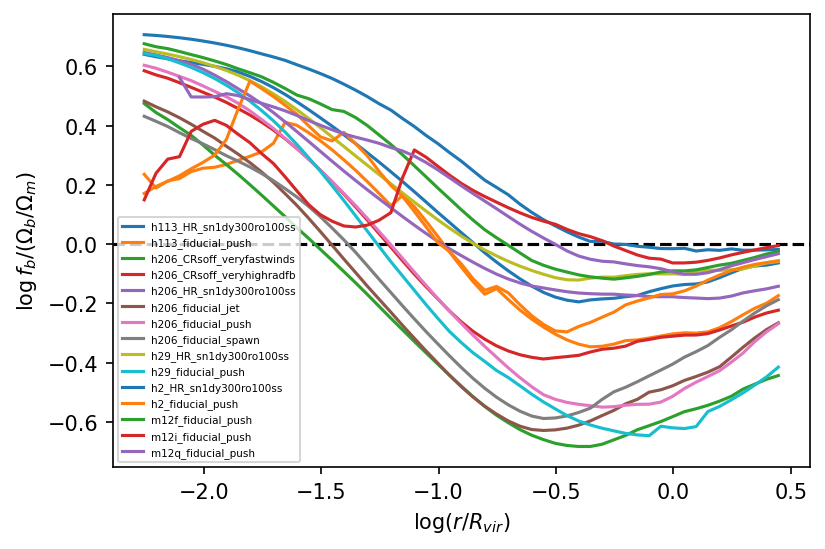

In [5]:
z0 = 'z0_1.0'
particle_types_num=[0,4]
particle_types=[0,1,2,4,5]
flabel = 'b'

fb_05 = []
fb_1 = []
fb_2 = []
fb_3 = []

plt.figure(dpi=150)
for halo in halos:
    allprofiles = h5todict(f'data/{halo}_allprofiles_widezbins.h5')
    snapdir = f'/projects/b1026/isultan/halos/{halo}'
    if not os.path.isdir(snapdir):
        snapdir = Quest_sims['nofb'][halo.split('_')[0]]
    cosmological_baryon_budget = read_param_file(snapdir)['OmegaBaryon']/read_param_file(snapdir)['Omega0']

    fbarr = []
    for k in allprofiles[z0].keys():
        totmass = np.sum( [allprofiles[z0][k][f'PartType{ptype}'] for ptype in particle_types], axis=0 )
        nummass = np.sum( [allprofiles[z0][k][f'PartType{ptype}'] for ptype in particle_types_num], axis=0 )
        with np.errstate(all='ignore'): fb = np.cumsum(nummass)/np.cumsum(totmass)/cosmological_baryon_budget
        fbarr.append(fb)
    fbarr = np.median(fbarr, axis=0)
    plt.plot(np.log10(allprofiles[z0][k]['rmid']), np.log10(fbarr), label=f'{halo}')
    fb_05.append(fbarr[39])
    fb_1.append(fbarr[45])
    fb_2.append(fbarr[51])
    fb_3.append(fbarr[54])
plt.legend(prop={'size': 5})
plt.axhline(0, ls='--', c='k', zorder=-1)
plt.xlabel(r'$\log (r/R_{vir})$')
plt.ylabel(f'$\log f_{{{flabel}}}/(\Omega_b / \Omega_m)$')

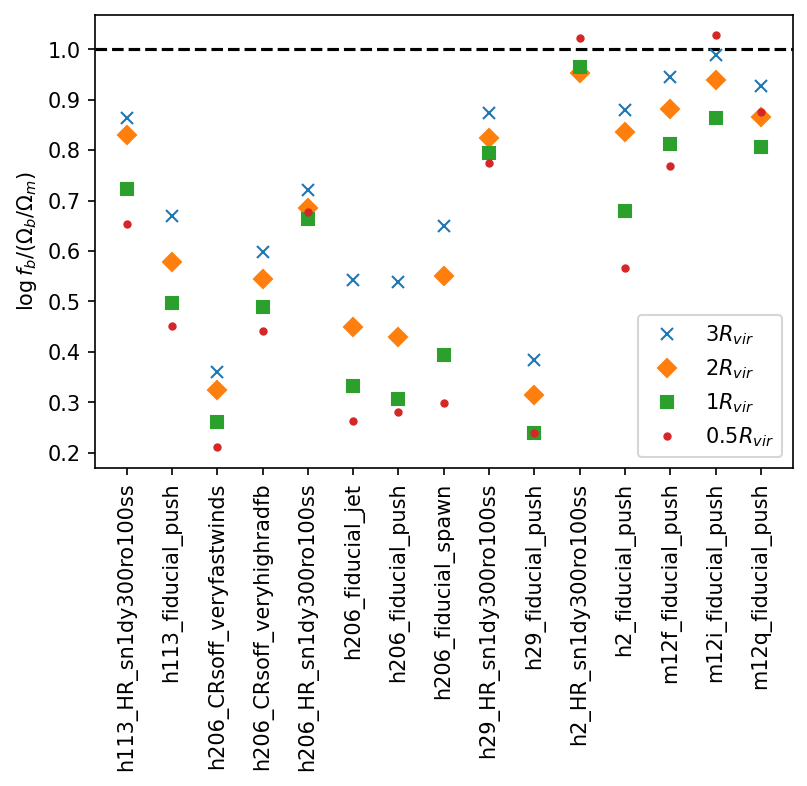

In [8]:
plt.figure(dpi=150)

plt.plot(fb_3, 'x', label='$3 R_{vir}$')
plt.plot(fb_2, 'D', label='$2 R_{vir}$')
plt.plot(fb_1, 's', label='$1 R_{vir}$')
plt.plot(fb_05, '.', label='$0.5 R_{vir}$')

plt.xticks(range(len(halos)), halos, rotation=90)
plt.axhline(1, ls='--', c='k', zorder=-1)
plt.ylabel(f'$\log f_{{{flabel}}}/(\Omega_b / \Omega_m)$')
plt.legend()

In [3]:
halos = [h.split('profiles_')[1].split('.h5')[0] for h in os.listdir('data/profiles')]
profiles = []
for i in tqdm(os.listdir('data/profiles')):
    profiles.append( h5todict(os.path.join('data/profiles', i)) )

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 408/408 [01:01<00:00,  6.65it/s]


In [2]:
from joblib import Parallel, delayed
profiles = Parallel(n_jobs=-1, verbose=1)(delayed(h5todict)(os.path.join('data/profiles', i)) for i in os.listdir('data/profiles'))
halos = [h.split('profiles_')[1].split('.h5')[0] for h in os.listdir('data/profiles')]
halo_names = [h.split('_')[0] for h in halos]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 397 out of 397 | elapsed:   38.0s finished


/tmp/ipykernel_5218/4141393104.py:26: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(profile['rmid']), np.log10(fbarr))#, label=f'{halo}')


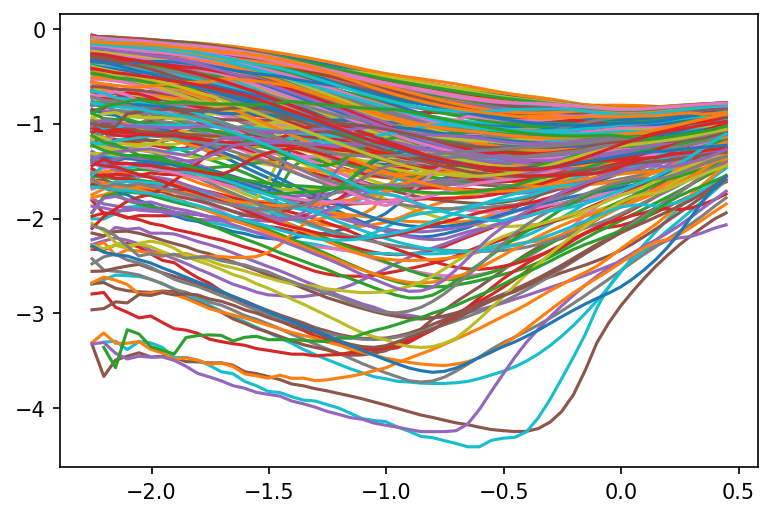

In [71]:
plt.figure(dpi=150)
fb_05 = []
fb_1 = []
fb_2 = []
fb_3 = []

Mvir = []

for profile in profiles:
    if 'SnapNum045' not in profile:
        continue
    particle_types_num=[0,4]
    particle_types=[0,1,2,4,5]
    profile = profile['SnapNum045']

    totmass = np.sum( [profile[f'TotalMass:PartType{ptype}'] for ptype in particle_types], axis=0 )
    nummass = np.sum( [profile[f'TotalMass:PartType{ptype}'] for ptype in particle_types_num], axis=0 )
    with np.errstate(all='ignore'): fbarr = np.cumsum(nummass)/np.cumsum(totmass)#/cosmological_baryon_budget
    
    fb_05.append(fbarr[39])
    fb_1.append(fbarr[45])
    fb_2.append(fbarr[51])
    fb_3.append(fbarr[54])
    Mvir.append(profile['Mvir'])
    
    plt.plot(np.log10(profile['rmid']), np.log10(fbarr))#, label=f'{halo}')

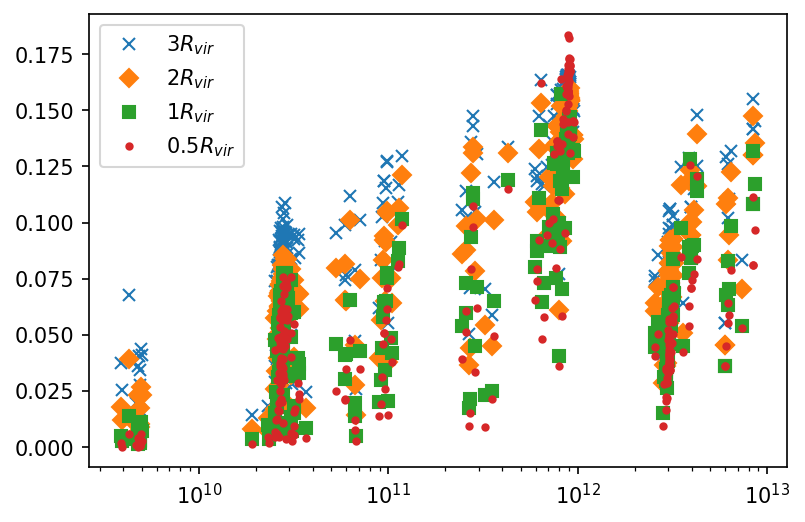

In [77]:
plt.figure(dpi=150)

plt.plot(Mvir, fb_3, 'x', label='$3 R_{vir}$')
plt.plot(Mvir, fb_2, 'D', label='$2 R_{vir}$')
plt.plot(Mvir, fb_1, 's', label='$1 R_{vir}$')
plt.plot(Mvir, fb_05, '.', label='$0.5 R_{vir}$')

# plt.axhline(1, ls='--', c='k', zorder=-1)
# plt.ylabel(f'$\log f_{{{flabel}}}/(\Omega_b / \Omega_m)$')
plt.xscale('log')
plt.legend()

In [20]:
def simstr(params):
    return '_'.join([ params[k] for k in ['fb_method', 'v_wind', 'cr_loading', 'fluxmom_factor', 'alpha_disk_factor', 'gravaccretion_model', 'accretion_factor'] ])

In [21]:
def model_match(simname, halos):
    halos_str = [simstr(params_from_filename(h)) if len(h.split('_'))>3 else None for h in halos]
    model1 = [i for i,hs in enumerate(halos_str) if hs==simstr(params_from_filename(simname))]
    return model1

In [22]:
def fbary_model(model1, profiles, SnapNum='SnapNum045', particle_types_num=[0,4], particle_types=[0,1,2,4,5]):
    fb_05 = []
    fb_1 = []
    fb_2 = []
    fb_3 = []

    Mvir = []
    Rvir = []
    names = []
    for i in model1:
        if SnapNum not in profiles[i]:
            print('Missing SnapNum', SnapNum, halos[i])
            continue
        profile = profiles[i][SnapNum]

        totmass = np.sum( [profile[f'TotalMass:PartType{ptype}'] for ptype in particle_types], axis=0 )
        nummass = np.sum( [profile[f'TotalMass:PartType{ptype}'] for ptype in particle_types_num], axis=0 )
        with np.errstate(all='ignore'): fbarr = np.cumsum(nummass)/np.cumsum(totmass)#/cosmological_baryon_budget

        fb_05.append(fbarr[39])
        fb_1.append(fbarr[45])
        fb_2.append(fbarr[51])
        fb_3.append(fbarr[54])
        Mvir.append(profile['Mvir'][()])
        Rvir.append(profile['Rvir'][()])
        names.append(halos[i])
        
#         plt.plot(np.log10(profile['rmid']), np.log10(fbarr))#, label=f'{halo}')
    return Mvir, Rvir, fb_05, fb_1, fb_2, fb_3, names

In [23]:
fiducial_models = {'fiducial push': 'm13h206_m5e4_push_alpha10_gacc30_accf1_vw10000_cr1e-2_msd1e-8_sdp1e-3_mw7e-8_fa0.5_tw1e4_fmom1',
         'fiducial jet': 'm13h113_m3e5_jet_alpha10_gacc30_accf1_vw10000_cr1e-2_msd1e-8_sdp4e-3_mw4e-7_fa0.5_tw1e4_fmom1',
         'fiducial spawn': 'm13h113_m3e5_spawn_alpha10_gacc30_accf1_vw10000_cr1e-2_msd1e-8_sdp4e-3_mw4e-7_fa0.5_tw1e4_fmom1',}
         #'m13h113_m3e5_push_alpha10_gacc30_accf1_vw42500_cr1e-6_msd1e-8_sdp4e-3_mw1e-8_fa0.5_tw1e4_fmom1',
         #'m13h113_m3e5_push_alpha10_gacc30_accf1_vw10000_cr1e-6_msd1e-8_sdp4e-3_mw1e-8_fa0.5_tw1e4_fmom100'}

In [24]:
Frontera_h206push_base = 'm13h206_m3e5_push_'
models_channels = {
            'radfboff':             Frontera_h206push_base + 'alpha10_gacc30_accf1_vw10000_cr1e-2_msd1e-8_sdp3e-3_mw4e-7_fa0.5_tw1e4_fmom1e-4',
            'good':                 Frontera_h206push_base + 'alpha10_gacc30_accf1_vw10000_cr1e-2_msd1e-8_sdp3e-3_mw4e-7_fa0.5_tw1e4_fmom1',
            'CRsoff_veryhighradfb': Frontera_h206push_base + 'alpha10_gacc30_accf1_vw10000_cr1e-6_msd1e-8_sdp3e-3_mw4e-7_fa0.5_tw1e4_fmom100',
            'CRsoff':               Frontera_h206push_base + 'alpha10_gacc30_accf1_vw10000_cr1e-6_msd1e-8_sdp3e-3_mw4e-7_fa0.5_tw1e4_fmom1',
            'veryslowwinds':        Frontera_h206push_base + 'alpha10_gacc30_accf1_vw100_cr1e-2_msd1e-8_sdp3e-3_mw4e-7_fa0.5_tw1e4_fmom1',
            'CRsoff_veryfastwinds': Frontera_h206push_base + 'alpha10_gacc30_accf1_vw42500_cr1e-6_msd1e-8_sdp3e-3_mw4e-7_fa0.5_tw1e4_fmom1'
}

[('m10q', 0.043789104, 4941748700.0), ('m11i', 0.08629906, 27320273000.0), ('m11a', 0.104296595, 28258693000.0), ('m11b', 0.09219766, 33539645000.0), ('m11q', 0.12705159, 98418480000.0), ('m11f', 0.14731927, 281595050000.0), ('m12i', 0.16366716, 640000000000.0), ('m12f', 0.1568145, 775095450000.0), ('m12i', 0.16243087, 906826550000.0), ('m12q', 0.15042718, 947444600000.0), ('m13h206', 0.08536025, 2652577200000.0), ('m13h206', 0.08567996, 3036326400000.0), ('m13h113', 0.10711599, 3972228400000.0), ('m13h29', 0.055353396, 5994665000000.0), ('m13h02', 0.14163546, 8389376600000.0)]
Missing SnapNum SnapNum045 m13h206_m5e4_jet_alpha10_gacc30_accf1_vw10000_cr1e-2_msd1e-8_sdp2e-3_mw7e-8_fa0.5_tw1e4_fmom1
[('m10q', 0.03583483, 4752765400.0), ('m11a', 0.09760225, 27304792000.0), ('m11i', 0.07758292, 29177762000.0), ('m11b', 0.0863312, 33655871000.0), ('m11d', 0.09895423, 59144724000.0), ('m11q', 0.11529414, 96992190000.0), ('m11h', 0.12942907, 117650550000.0), ('m11f', 0.14289325, 281846380000.0

Text(0.045, 0.5, '$f_{b}$')

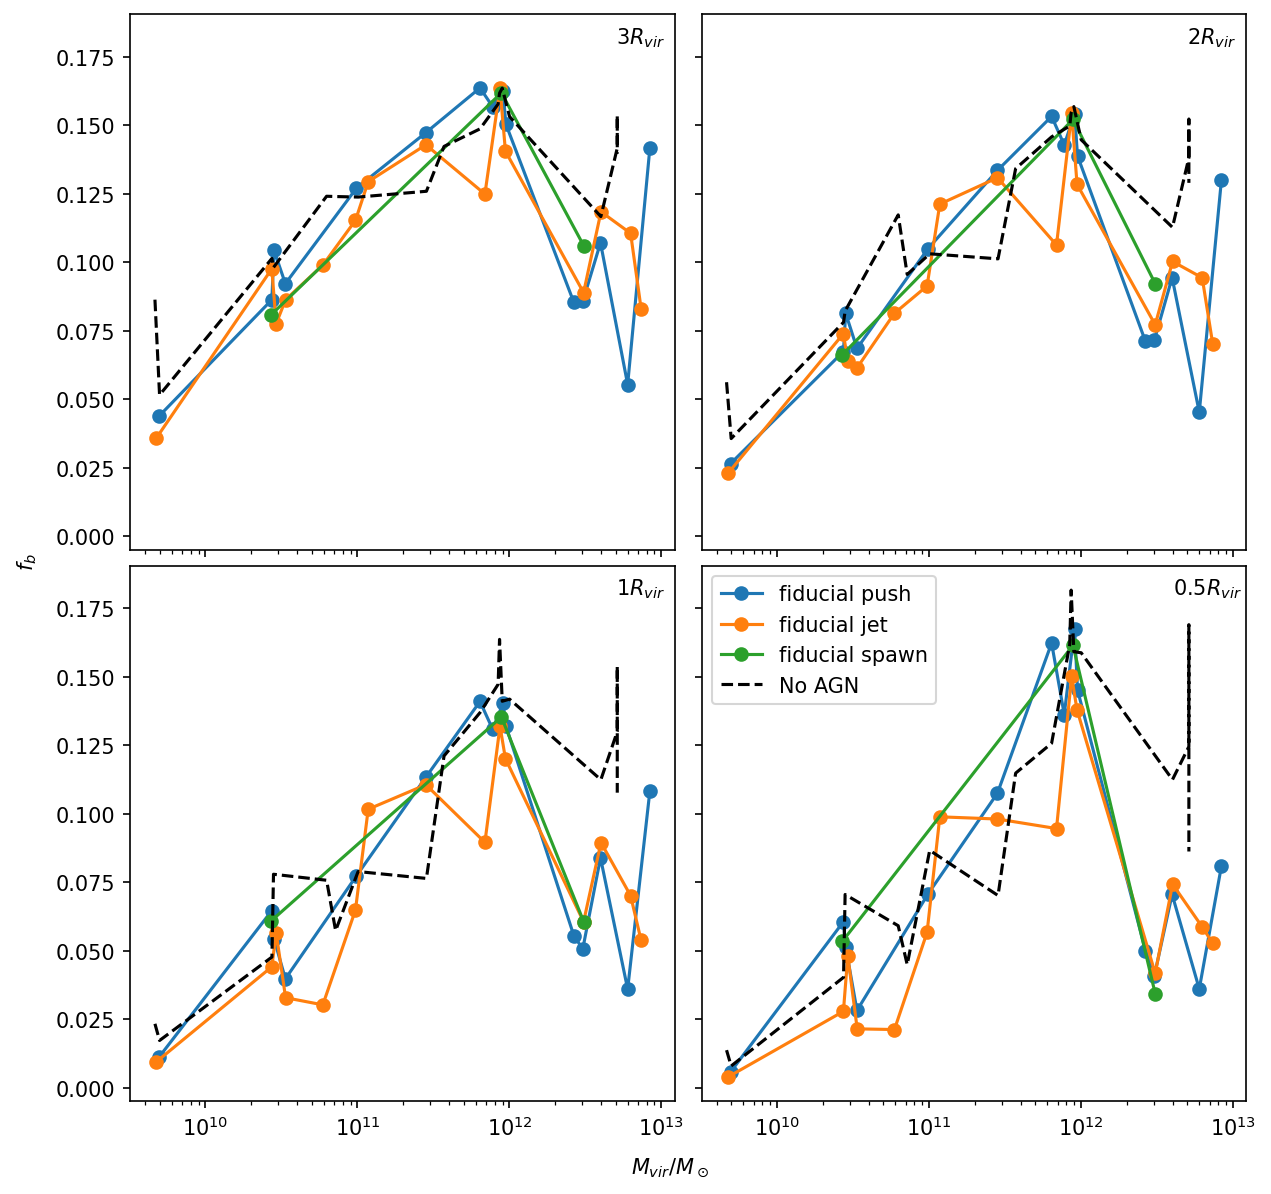

In [8]:
Mvir_all = []
Rvir_all = []
names_all = []

flabel='b'
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, gridspec_kw={'wspace': .05, 'hspace':.03}, figsize=[4.8*2,4.8*2], dpi=150, facecolor='w')

for model_name, simname in fiducial_models.items():
    Mvir, Rvir, fb_05, fb_1, fb_2, fb_3, names = fbary_model(model_match(simname, halos), profiles)

    axes[0,0].plot(np.sort(Mvir), np.array(fb_3)[np.argsort(Mvir)], 'o-', label='$3 R_{vir}$')
    axes[0,1].plot(np.sort(Mvir), np.array(fb_2)[np.argsort(Mvir)], 'o-', label='$2 R_{vir}$')
    axes[1,0].plot(np.sort(Mvir), np.array(fb_1)[np.argsort(Mvir)], 'o-', label='$1 R_{vir}$')
    axes[1,1].plot(np.sort(Mvir), np.array(fb_05)[np.argsort(Mvir)], 'o-', label=model_name)#'$0.5 R_{vir}$')

    Mvir_all += Mvir
    Rvir_all += Rvir
    names_all += names
    print(list(zip(np.array([n.split('_')[0] for n in names])[np.argsort(Mvir)], np.array(fb_3)[np.argsort(Mvir)], np.array(Mvir)[np.argsort(Mvir)])))

Mvir, Rvir, fb_05, fb_1, fb_2, fb_3, names = fbary_model([i for i,hs in enumerate(halos) if 'noAGN' in hs], profiles, SnapNum='SnapNum277', particle_types=[0,1,2,4])
axes[0,0].plot(np.sort(Mvir), np.array(fb_3)[np.argsort(Mvir)], 'k--', label='$3 R_{vir}$')
axes[0,1].plot(np.sort(Mvir), np.array(fb_2)[np.argsort(Mvir)], 'k--', label='$2 R_{vir}$')
axes[1,0].plot(np.sort(Mvir), np.array(fb_1)[np.argsort(Mvir)], 'k--', label='$1 R_{vir}$')
axes[1,1].plot(np.sort(Mvir), np.array(fb_05)[np.argsort(Mvir)], 'k--', label='No AGN')#'$0.5 R_{vir}$')

Mvir_all += Mvir
Rvir_all += Rvir
names_all += names

axes[0,0].text(5e12, 0.18, '$3 R_{vir}$')
axes[0,1].text(5e12, 0.18, '$2 R_{vir}$')
axes[1,0].text(5e12, 0.18, '$1 R_{vir}$')
axes[1,1].text(4e12, 0.18, '$0.5 R_{vir}$')

axes[1,1].legend()

# plt.axhline(1, ls='--', c='k', zorder=-1)
# plt.ylabel(f'$\log f_{{{flabel}}}/(\Omega_b / \Omega_m)$')
plt.xscale('log')

# plt.xlabel(r'$\log (r/R_{vir})$')
fig.text(0.5, 0.075, '$M_{vir}/M_\odot$', ha='center')
fig.text(0.045, 0.5, f'$f_{{{flabel}}}$', va='center', rotation='vertical')

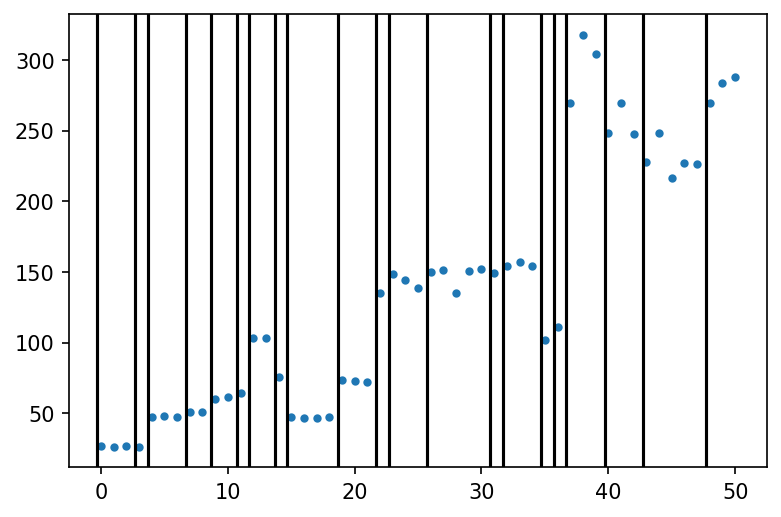

In [9]:
plt.figure(dpi=150)
halonames = ['m13'+n if n[0]=='h' else n for n in [n.split('_')[0] for n in names_all]]
plt.plot(np.array(Rvir_all)[np.argsort(halonames)], '.')

for x in np.unique(np.sort(halonames), return_index=True)[1]:
    plt.axvline(x-.3, c='k')

Missing SnapNum SnapNum045 m13h206_m3e5_push_alpha10_gacc30_accf1_vw10000_cr1e-2_msd1e-8_sdp3e-3_mw4e-7_fa0.5_tw1e4_fmom1e-4
Missing SnapNum SnapNum045 m13h206_m3e5_push_alpha10_gacc30_accf1_vw10000_cr1e-6_msd1e-8_sdp3e-3_mw4e-7_fa0.5_tw1e4_fmom1
Missing SnapNum SnapNum277 m11b_noAGNfb
Missing SnapNum SnapNum277 m11h_noAGNfb
Missing SnapNum SnapNum277 m11f_noAGNfb


Text(0.045, 0.5, '$f_{b}$')

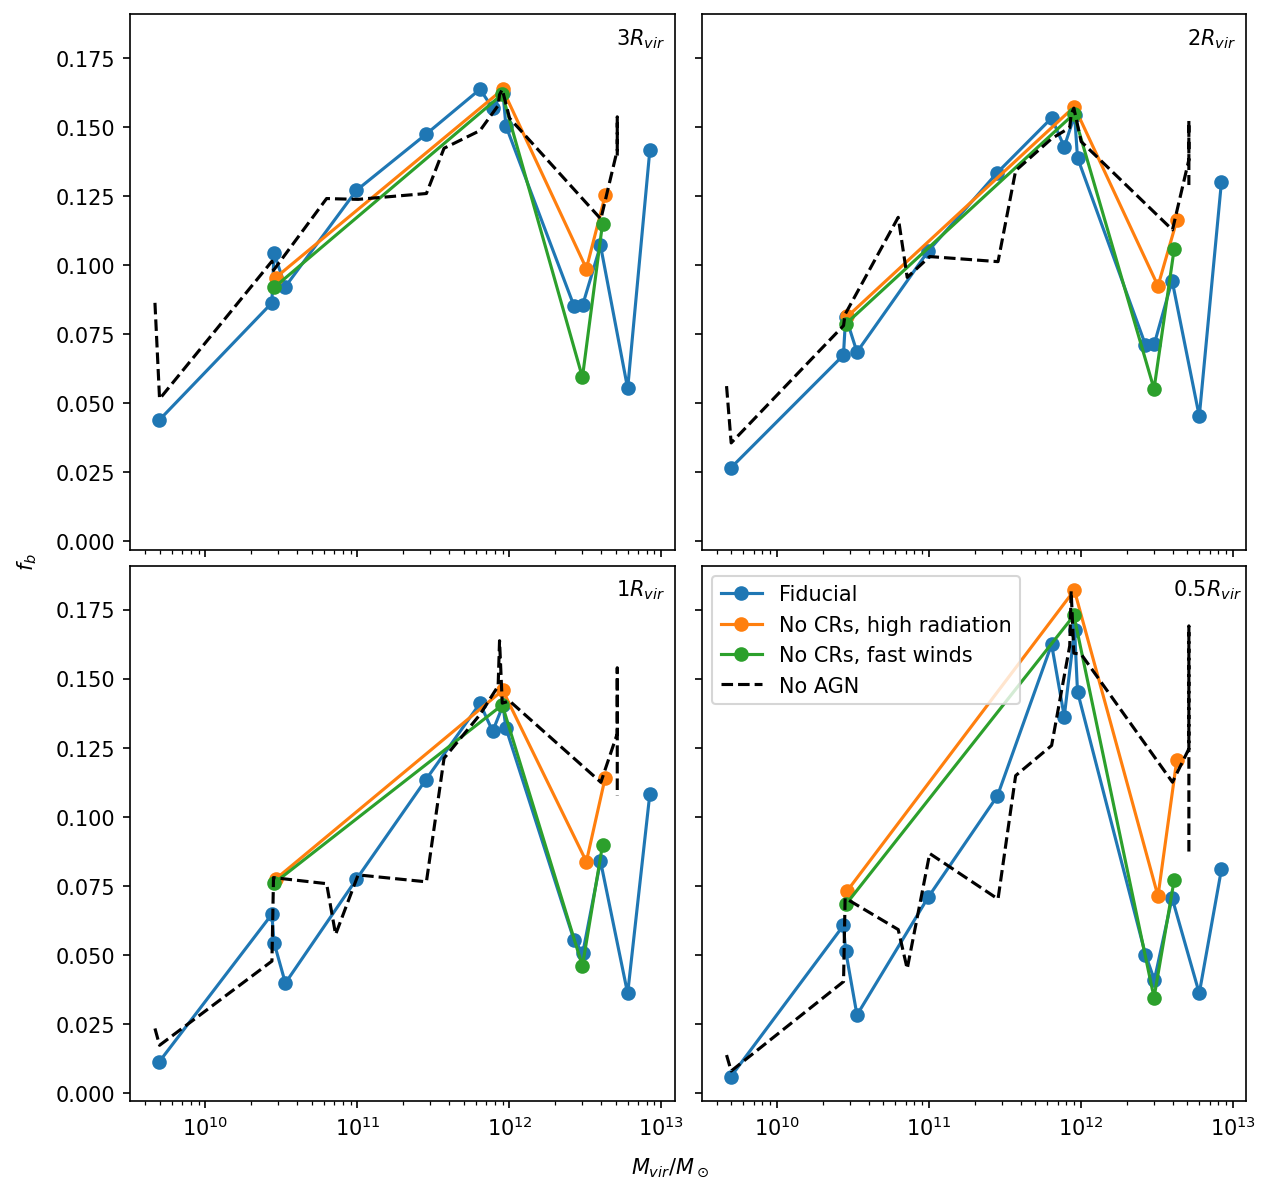

In [9]:
modelname = {'radfboff':'No radiation', 'good':'Fiducial', 'CRsoff_veryhighradfb':'No CRs, high radiation', 'veryslowwinds':'Slow winds', 'CRsoff_veryfastwinds':'No CRs, fast winds', 'CRsoff':'No CRs'}

flabel='b'
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, gridspec_kw={'wspace': .05, 'hspace':.03}, figsize=[4.8*2,4.8*2], dpi=150, facecolor='w')

for model_name, simname in models_channels.items():
    Mvir, fb_05, fb_1, fb_2, fb_3 = fbary_model(model_match(simname, halos), profiles)
    if len(Mvir) < 2: continue

    axes[0,0].plot(np.sort(Mvir), np.array(fb_3)[np.argsort(Mvir)], 'o-', label='$3 R_{vir}$')
    axes[0,1].plot(np.sort(Mvir), np.array(fb_2)[np.argsort(Mvir)], 'o-', label='$2 R_{vir}$')
    axes[1,0].plot(np.sort(Mvir), np.array(fb_1)[np.argsort(Mvir)], 'o-', label='$1 R_{vir}$')
    axes[1,1].plot(np.sort(Mvir), np.array(fb_05)[np.argsort(Mvir)], 'o-', label=modelname[model_name])#'$0.5 R_{vir}$')

Mvir, fb_05, fb_1, fb_2, fb_3 = fbary_model([i for i,hs in enumerate(halos) if 'noAGN' in hs], profiles, SnapNum='SnapNum277', particle_types=[0,1,2,4])
axes[0,0].plot(np.sort(Mvir), np.array(fb_3)[np.argsort(Mvir)], 'k--', label='$3 R_{vir}$')
axes[0,1].plot(np.sort(Mvir), np.array(fb_2)[np.argsort(Mvir)], 'k--', label='$2 R_{vir}$')
axes[1,0].plot(np.sort(Mvir), np.array(fb_1)[np.argsort(Mvir)], 'k--', label='$1 R_{vir}$')
axes[1,1].plot(np.sort(Mvir), np.array(fb_05)[np.argsort(Mvir)], 'k--', label='No AGN')#'$0.5 R_{vir}$')

axes[0,0].text(5e12, 0.18, '$3 R_{vir}$')
axes[0,1].text(5e12, 0.18, '$2 R_{vir}$')
axes[1,0].text(5e12, 0.18, '$1 R_{vir}$')
axes[1,1].text(4e12, 0.18, '$0.5 R_{vir}$')

axes[1,1].legend()

# plt.axhline(1, ls='--', c='k', zorder=-1)
# plt.ylabel(f'$\log f_{{{flabel}}}/(\Omega_b / \Omega_m)$')
plt.xscale('log')

# plt.xlabel(r'$\log (r/R_{vir})$')
fig.text(0.5, 0.075, '$M_{vir}/M_\odot$', ha='center')
fig.text(0.045, 0.5, f'$f_{{{flabel}}}$', va='center', rotation='vertical')

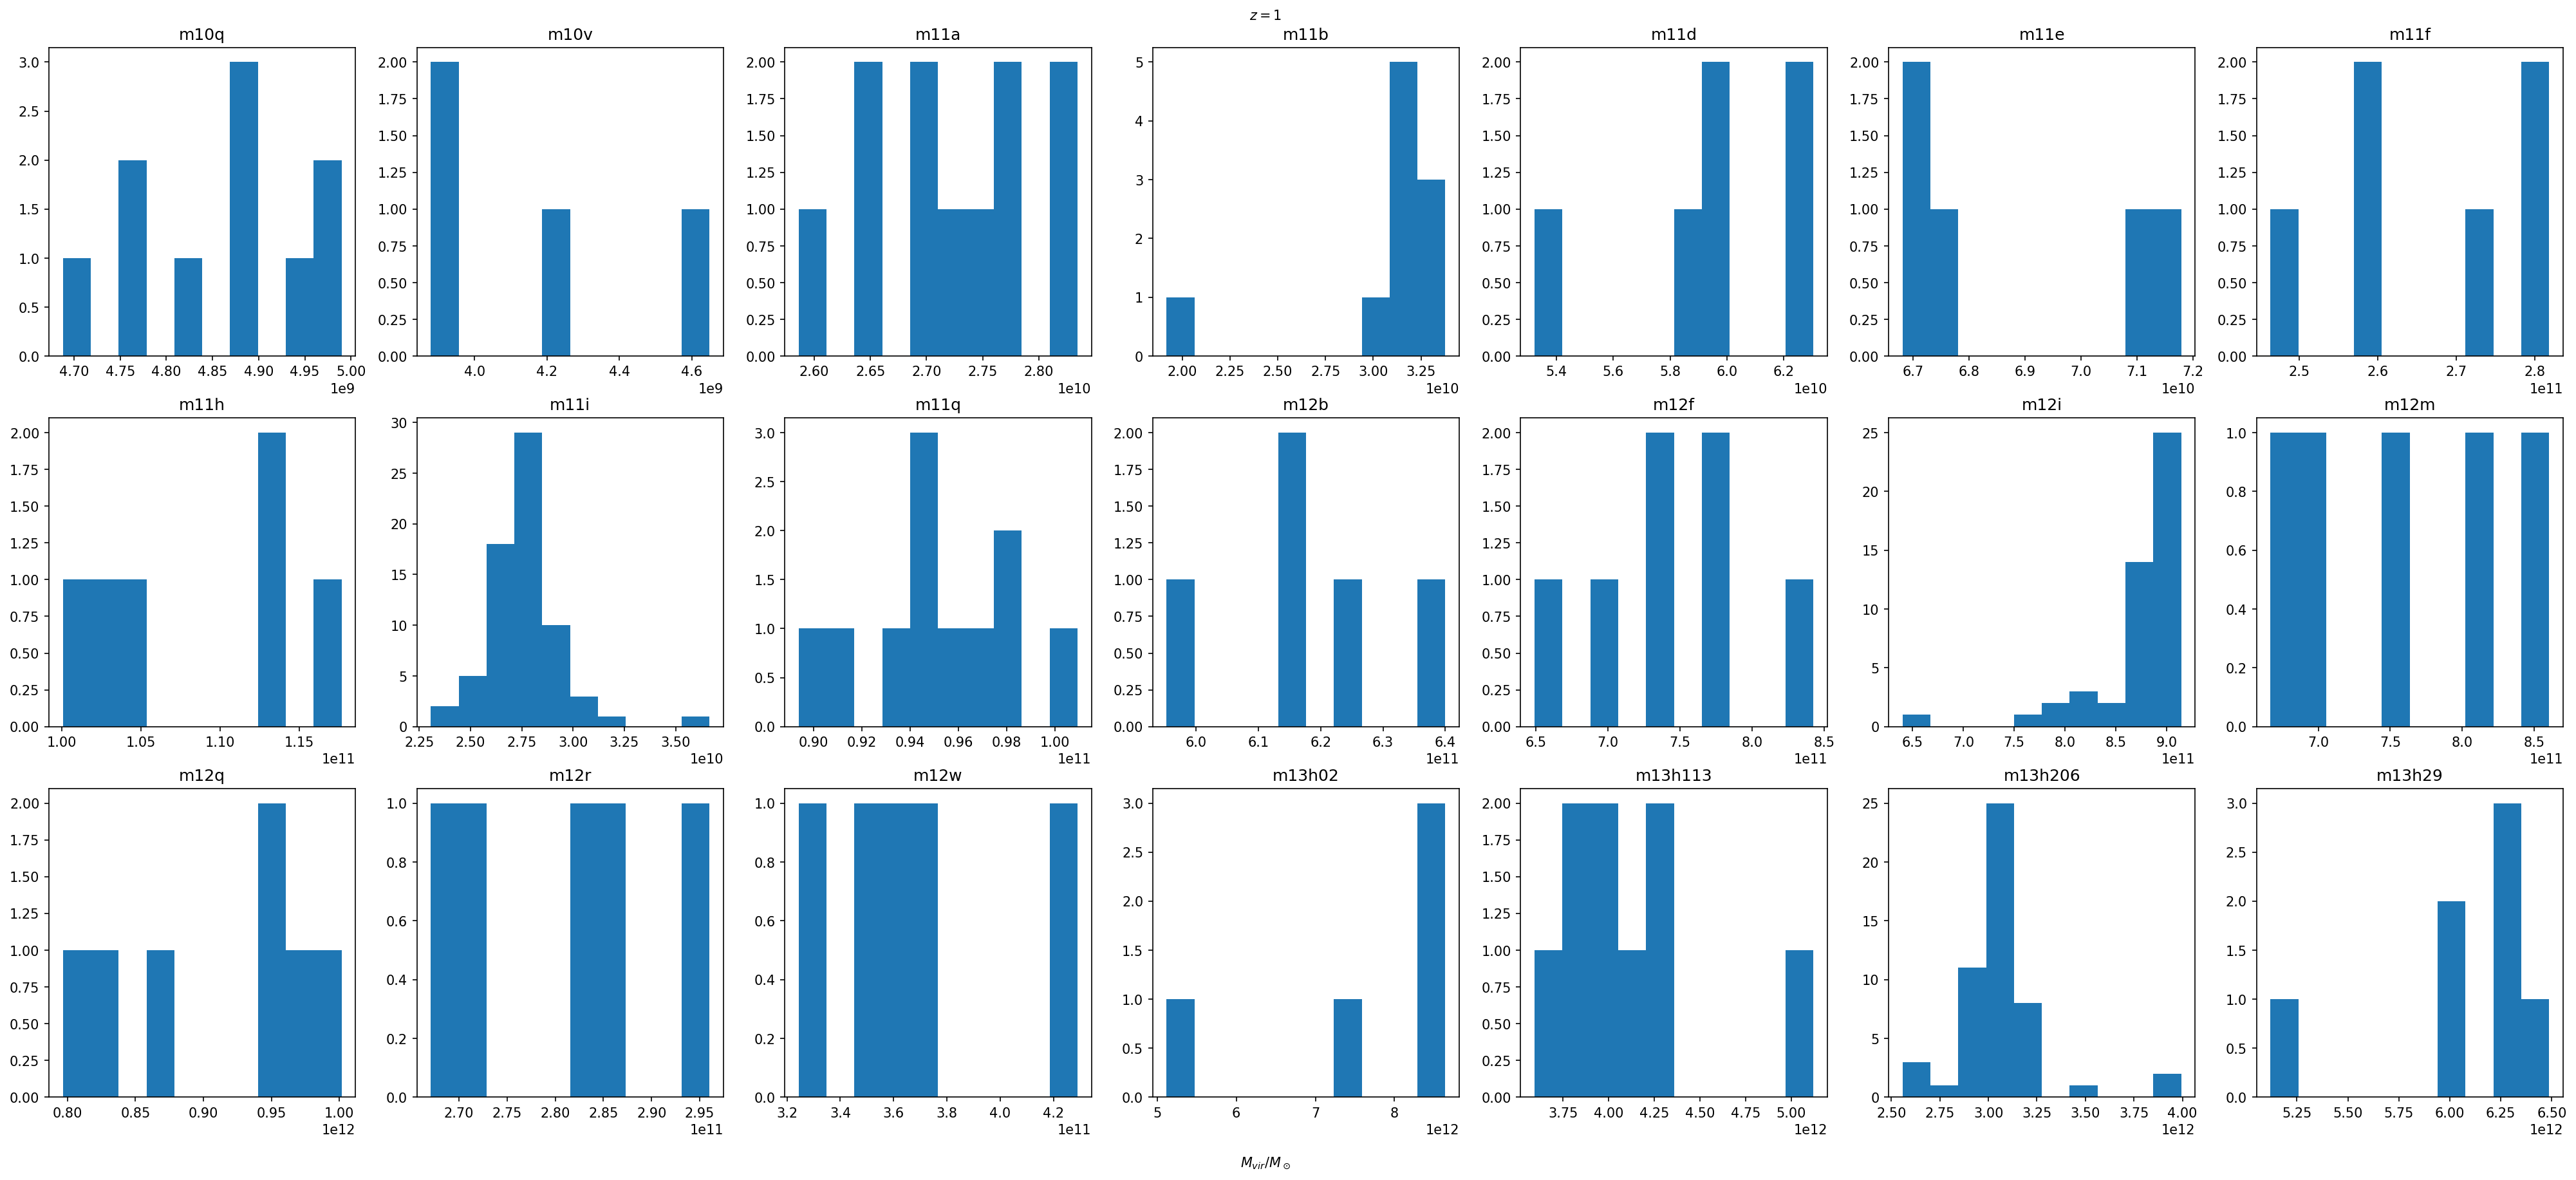

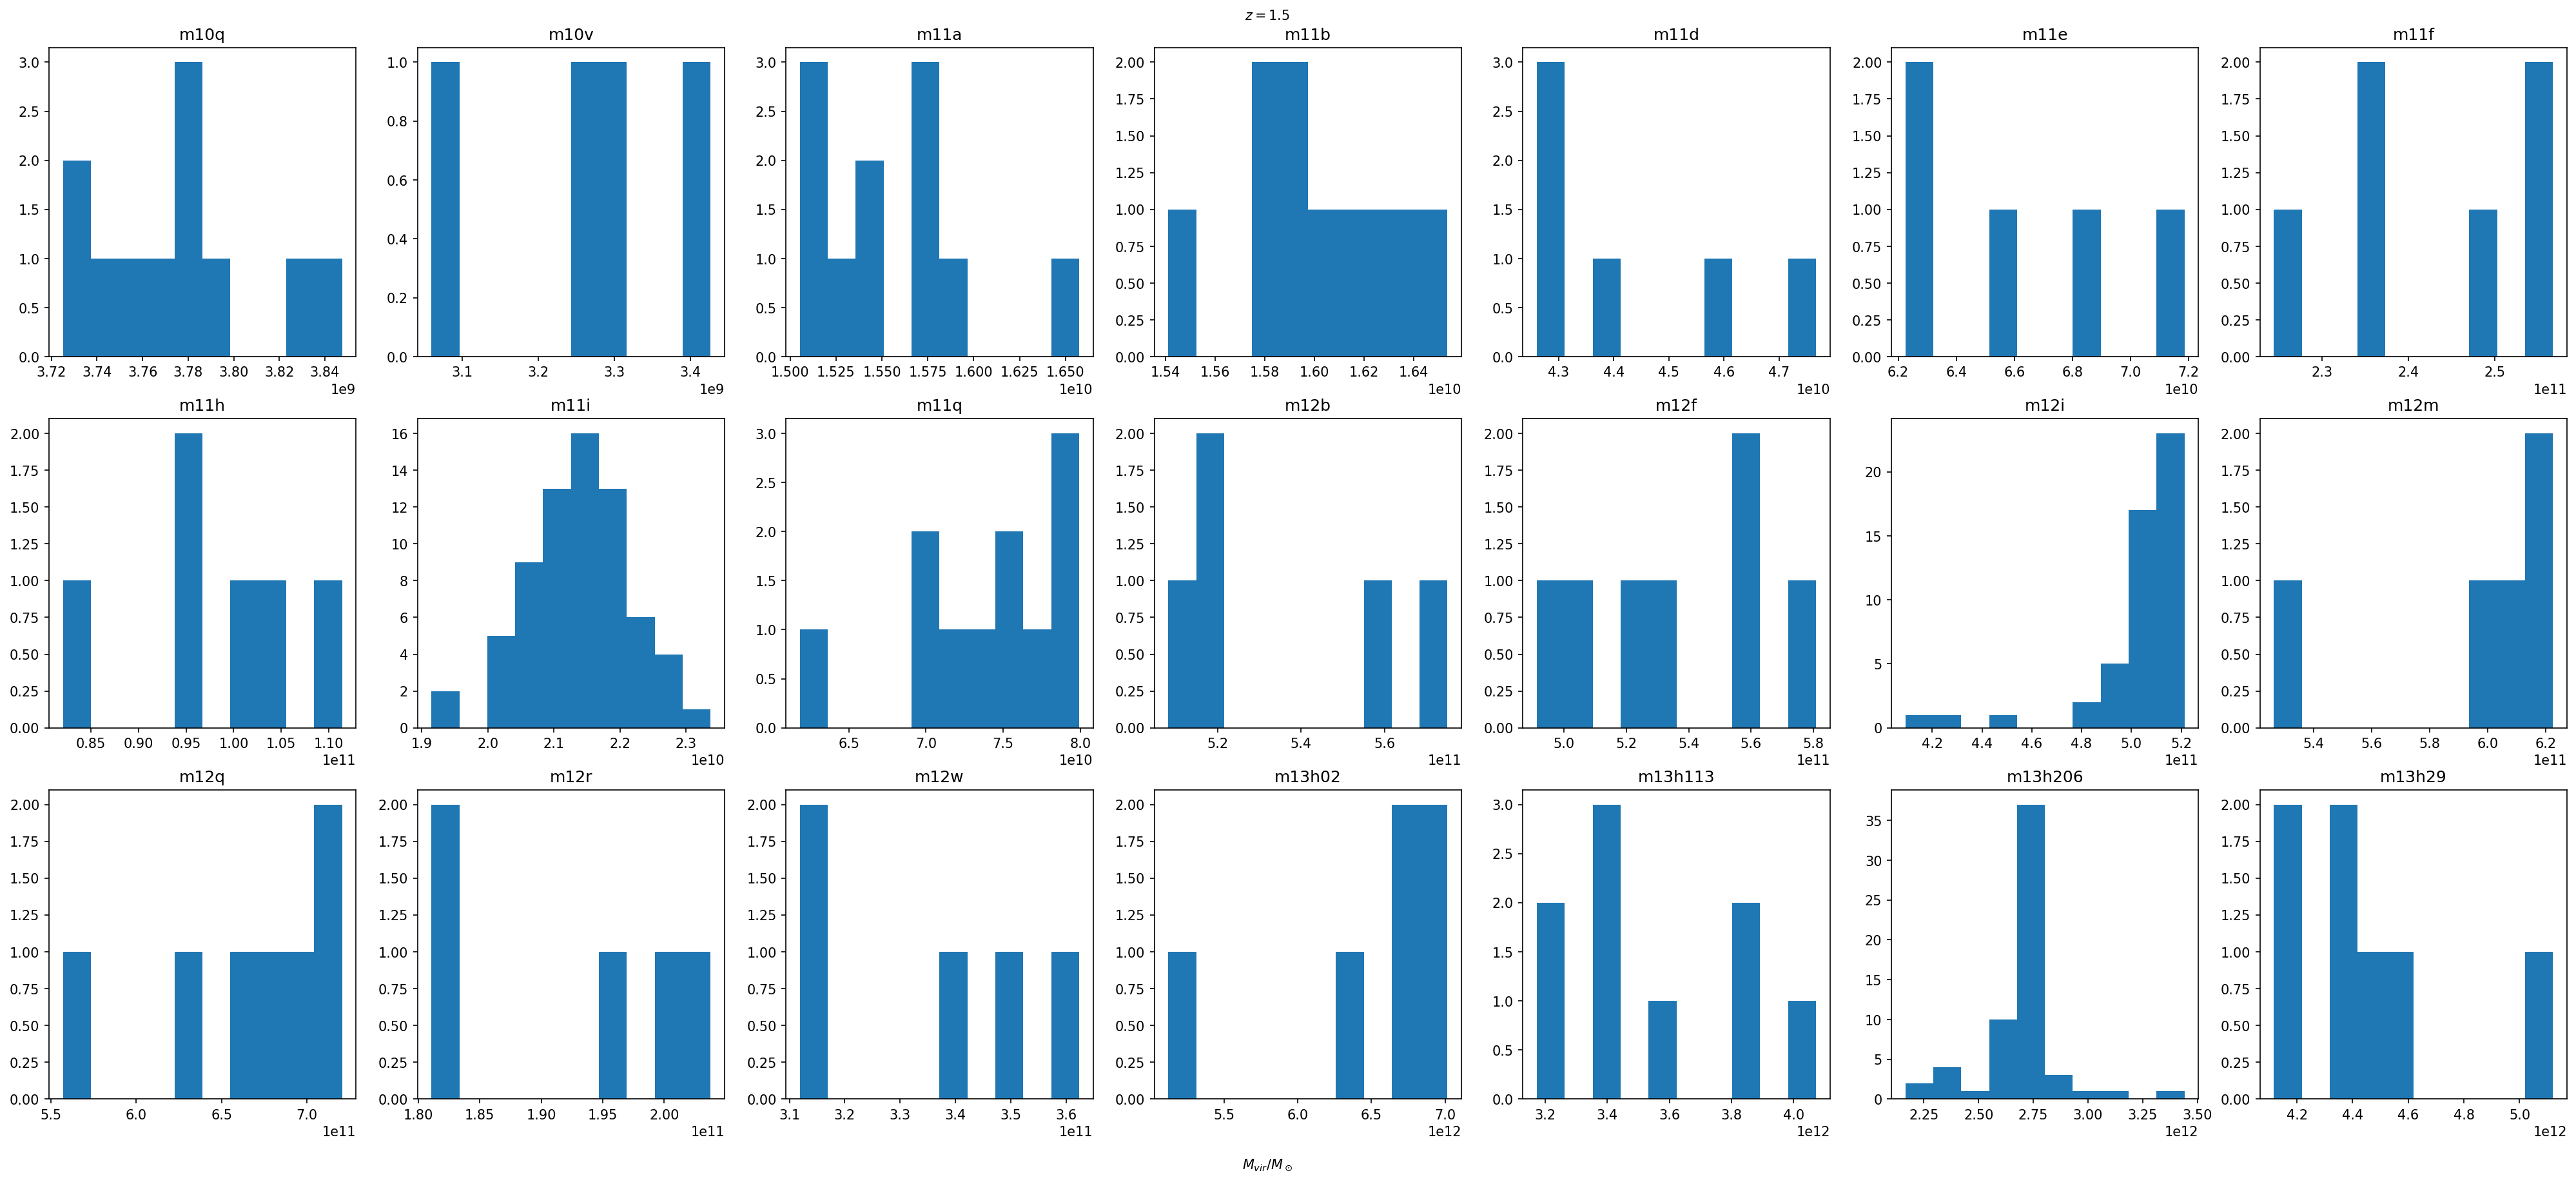

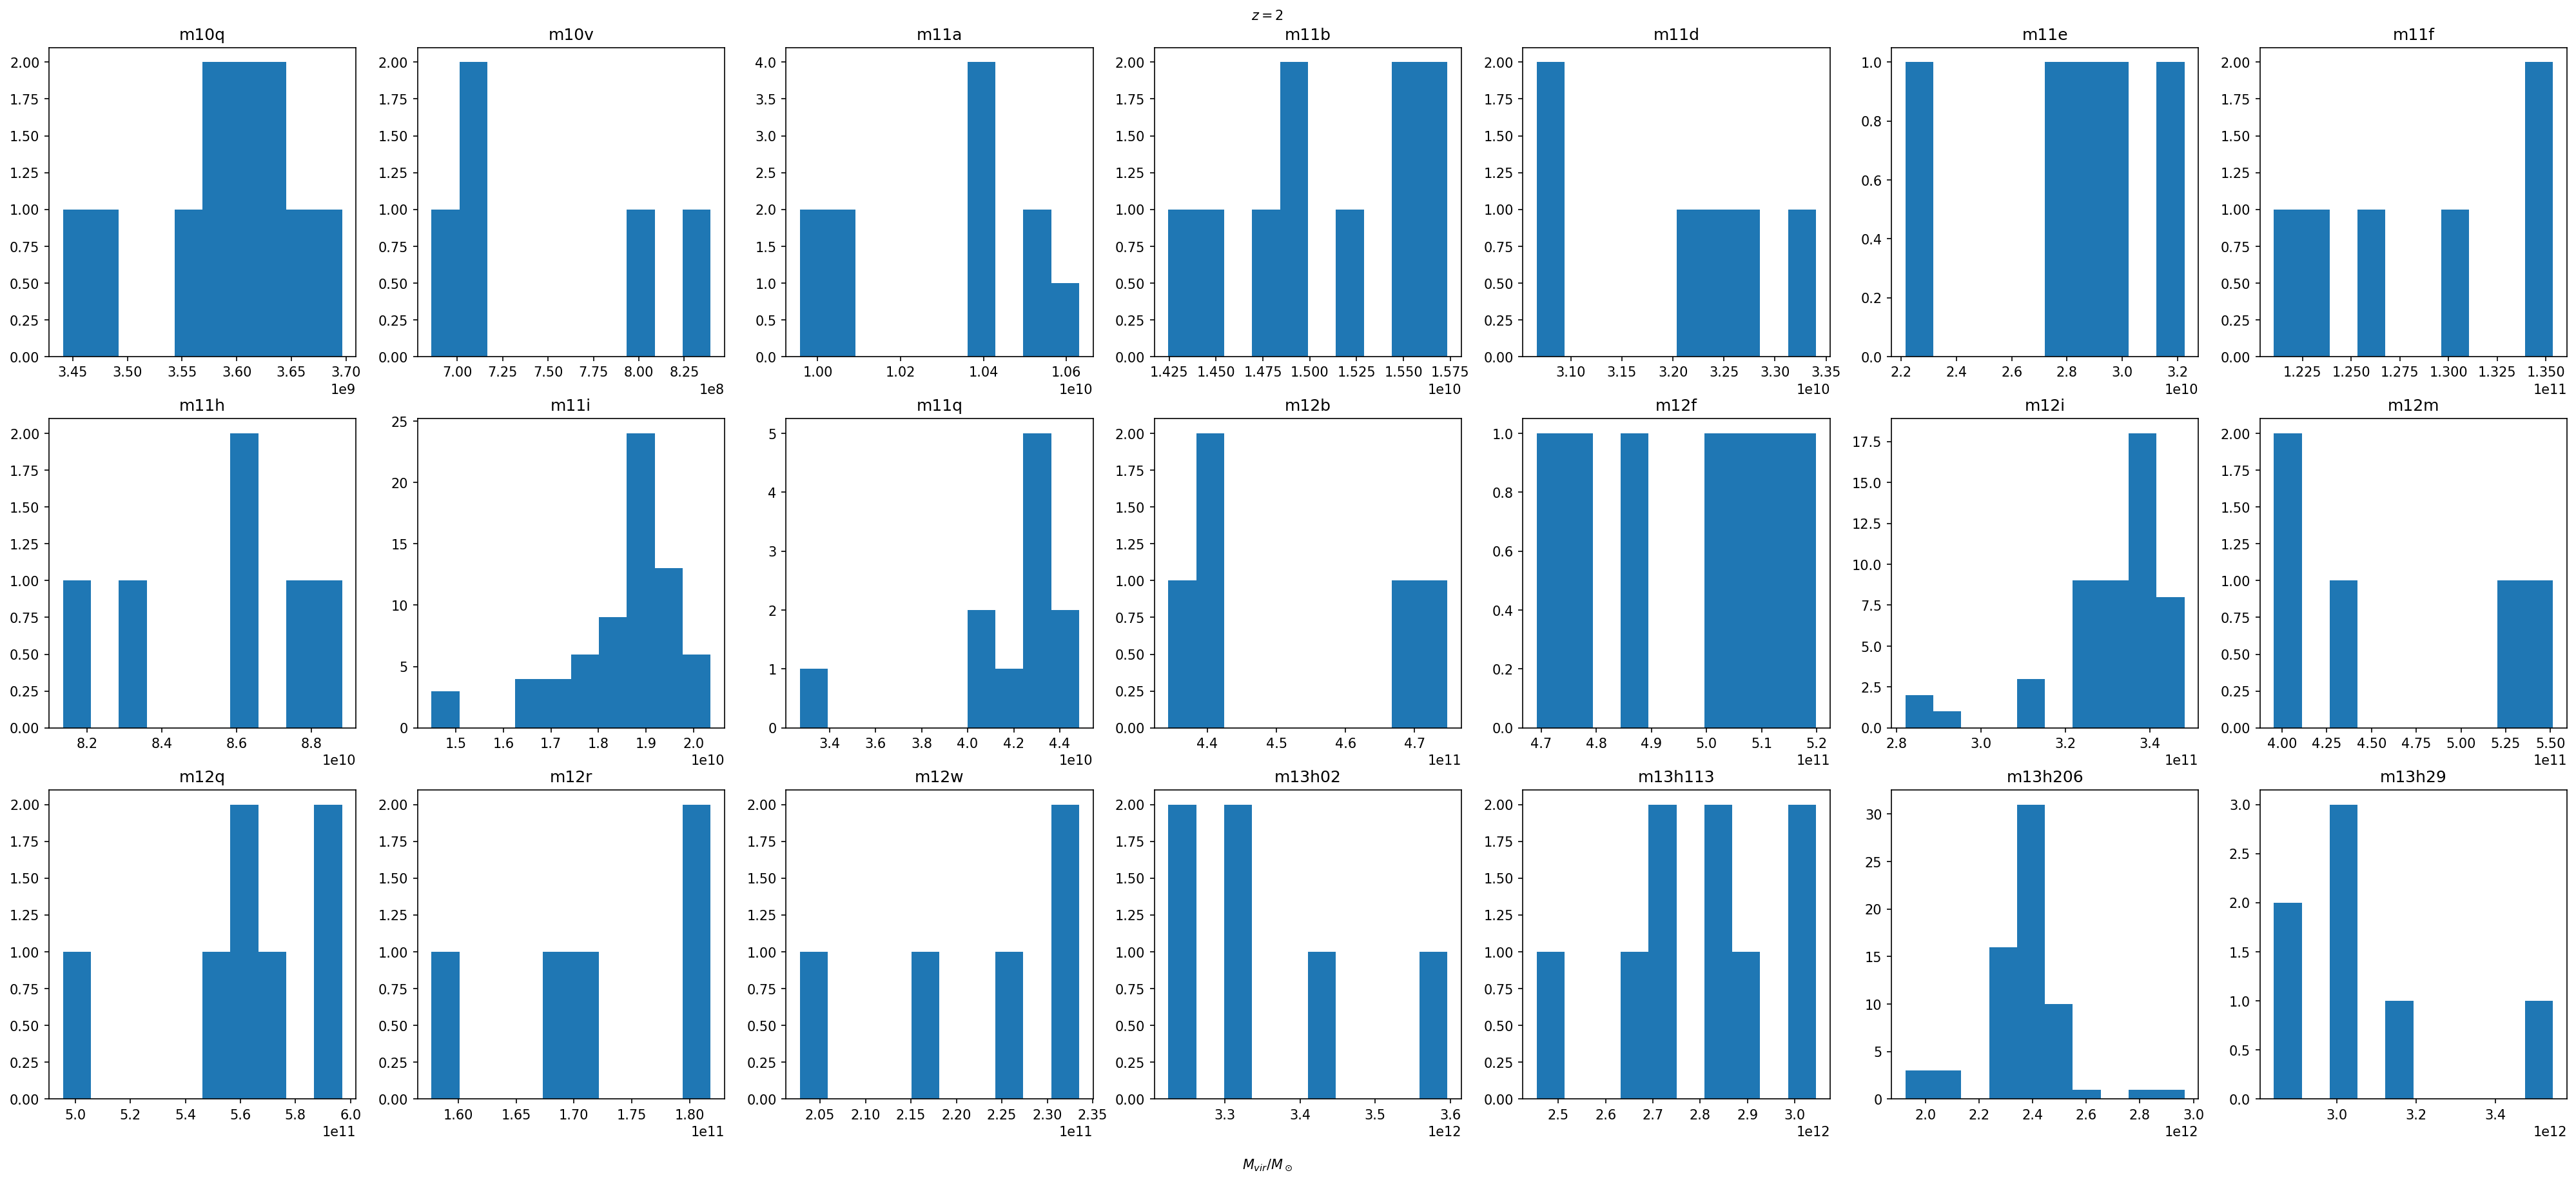

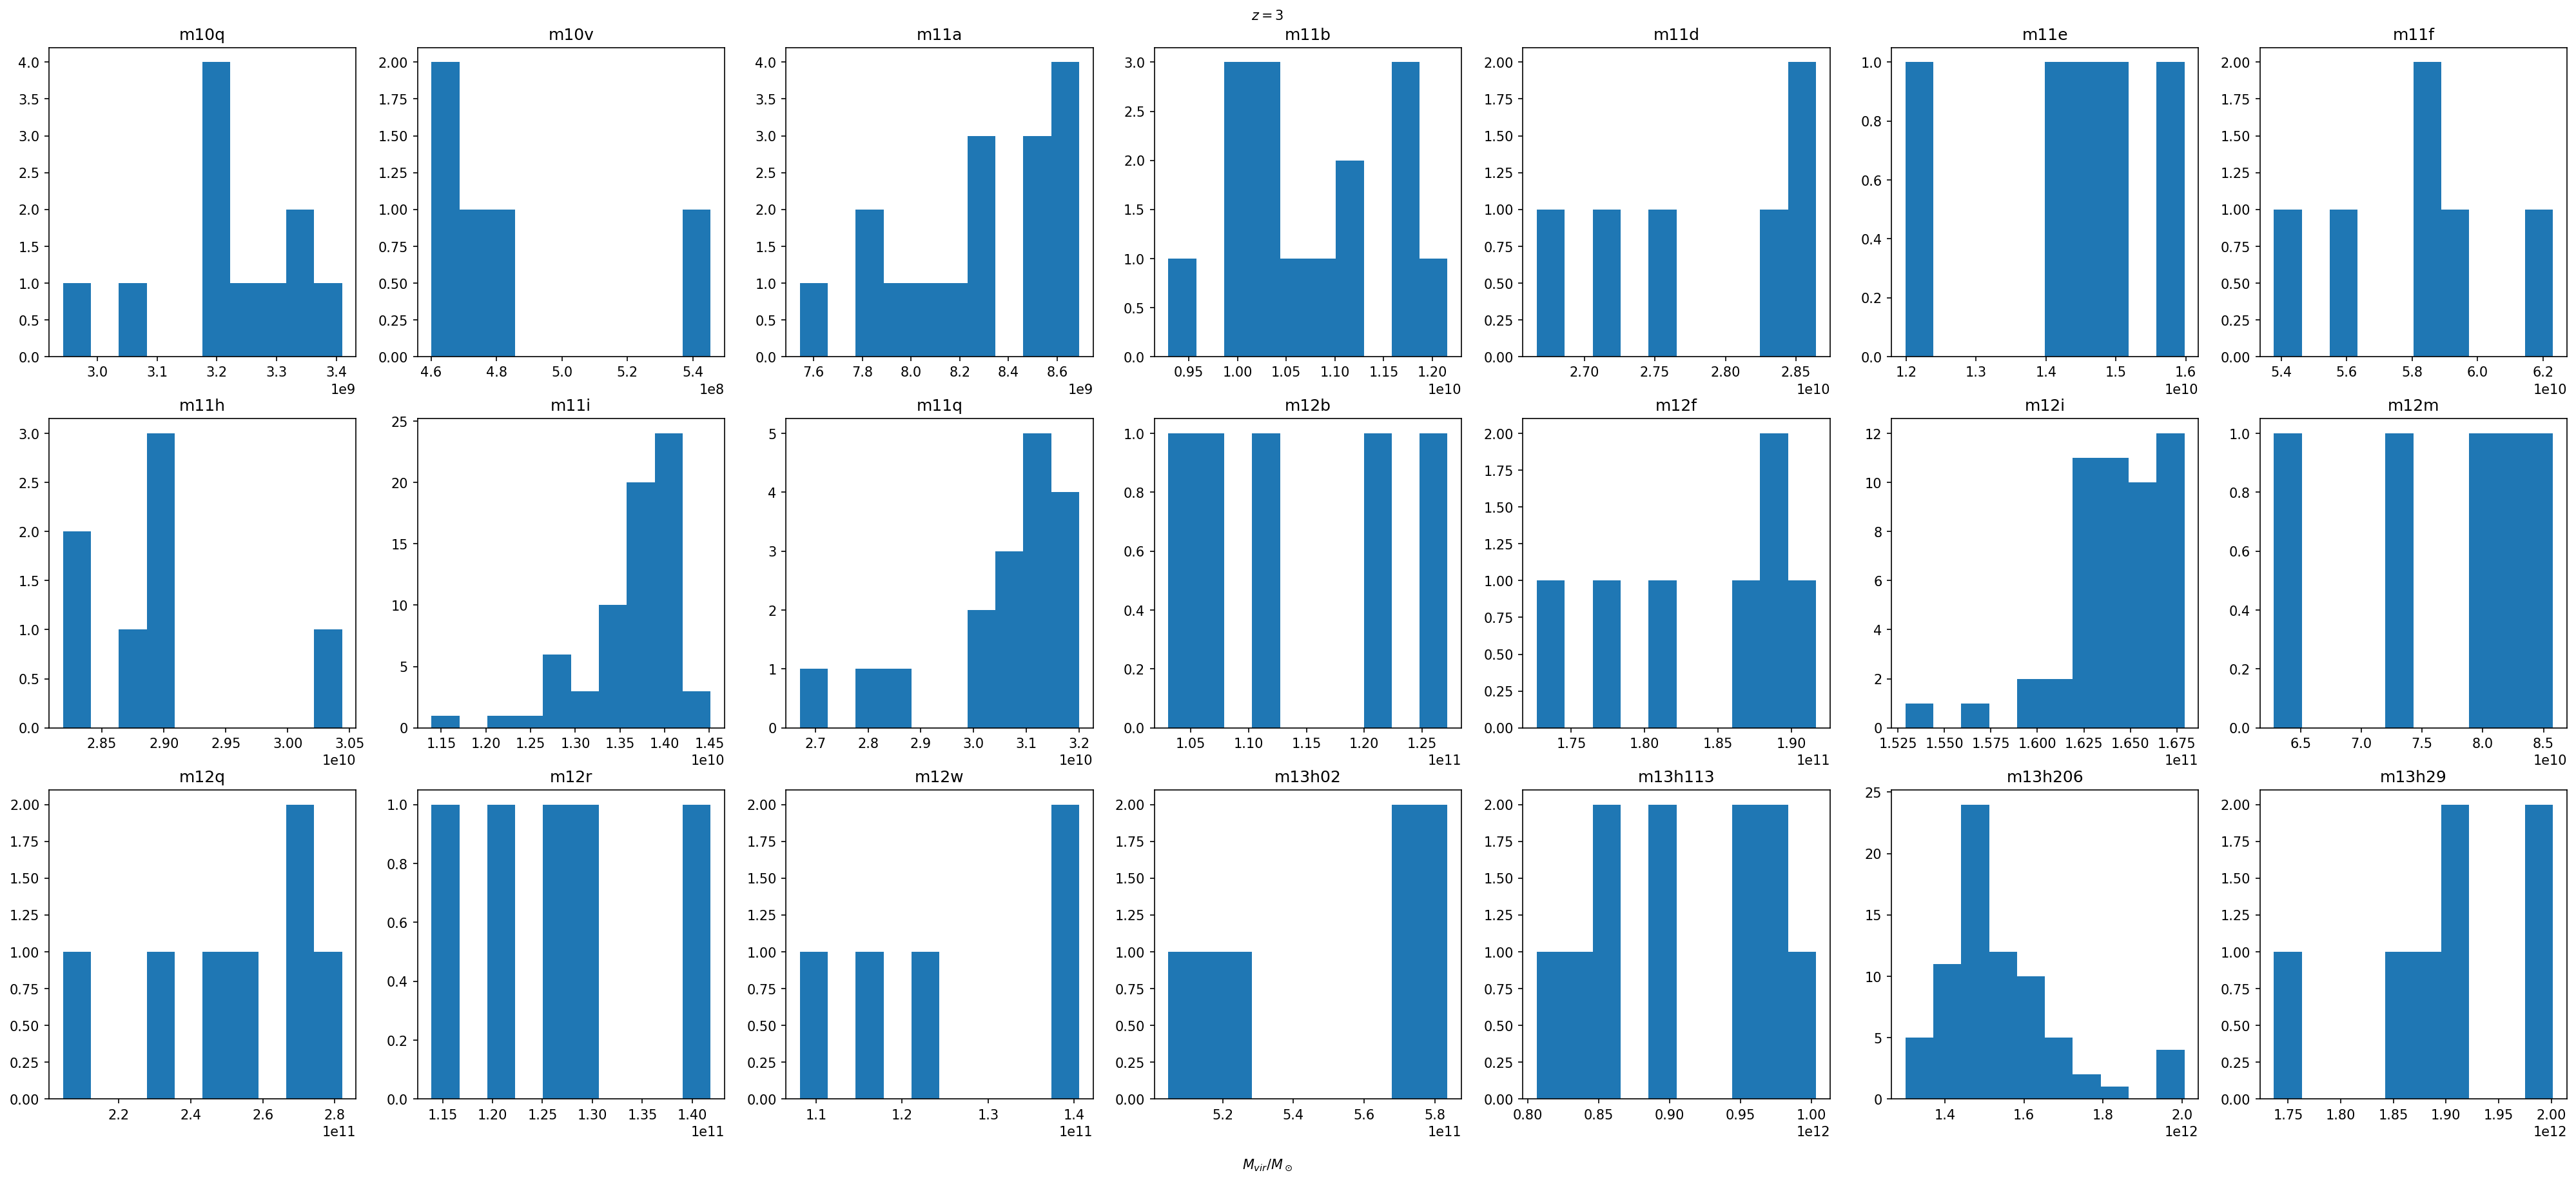

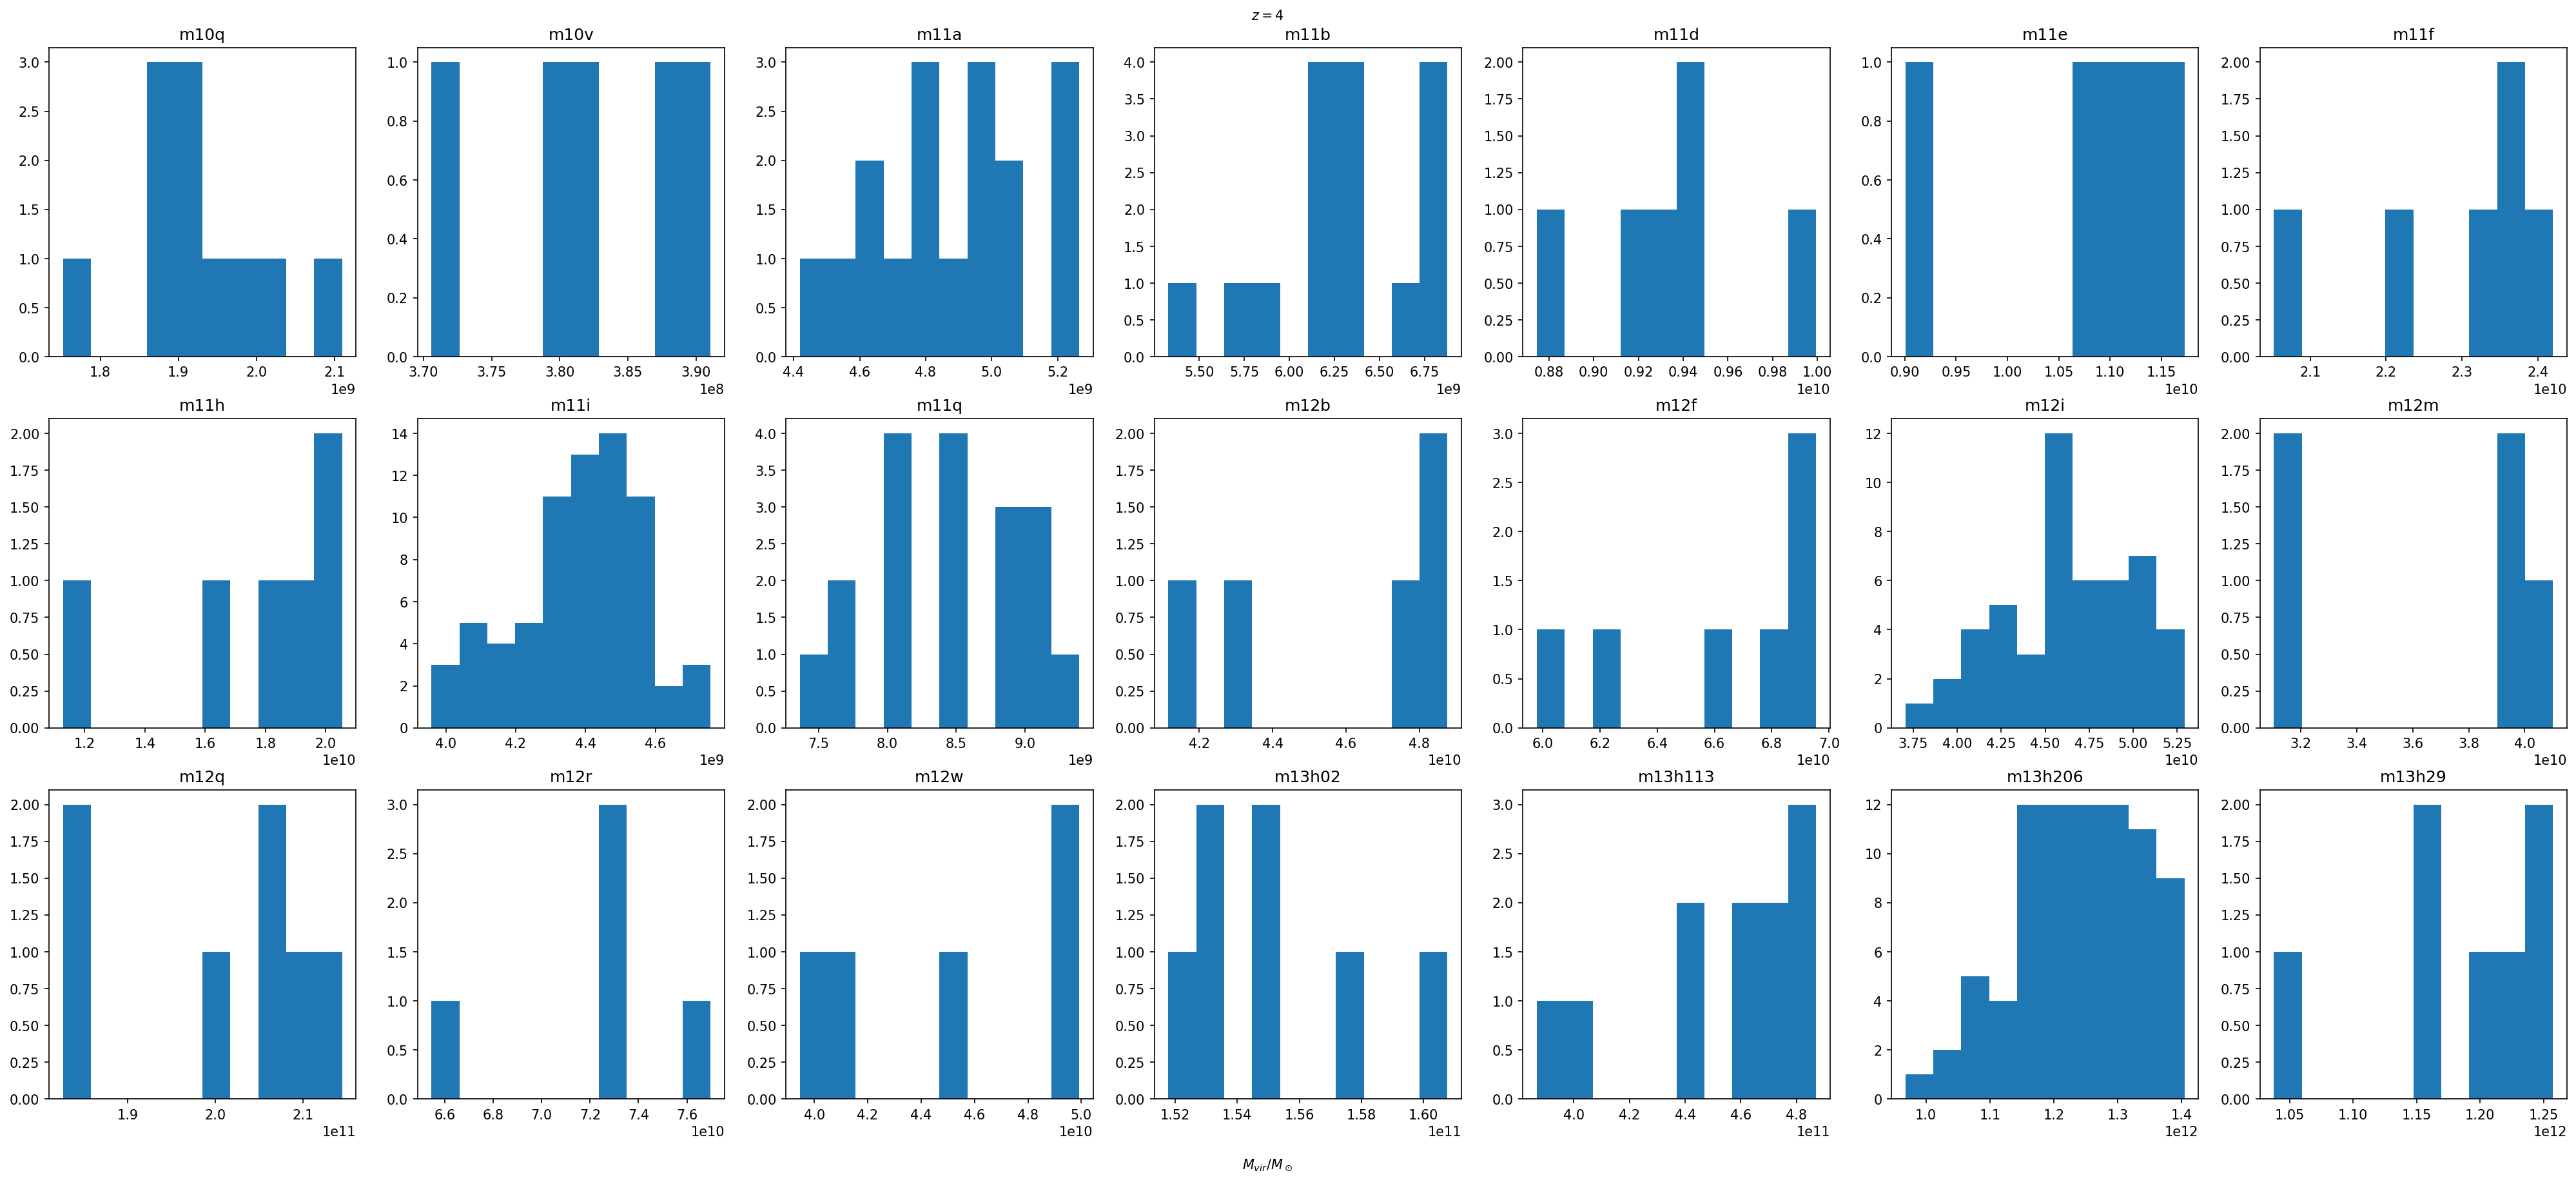

In [80]:
for SnapNum in [1, 1.5, 2, 3, 4]:

    Mvir_dict = {k:[] for k in np.unique(halo_names)} 
    Rvir_dict = {k:[] for k in np.unique(halo_names)} 
    Mvir_noAGN = {}
    Rvir_noAGN = {}

    for hn, h, p in zip(halo_names, halos, profiles):
        snapfound = False
        for s in p.keys():
            if round(p[s]['Redshift'][()],5) == SnapNum:
                snapfound = True
                Mvir_dict[hn].append(p[s]['Mvir'][()])
                Rvir_dict[hn].append(p[s]['Rvir'][()])
                if 'noAGN' in h:
                    Mvir_noAGN[hn] = Mvir_dict[hn][-1]
                    Rvir_noAGN[hn] = Rvir_dict[hn][-1]
                break
        if not snapfound: pass#print('Missing SnapNum', SnapNum, h)
    
    fig, axes = plt.subplots(3, 7, gridspec_kw={'wspace': .2, 'hspace':.2}, figsize=[4.8*7,4.8*3], dpi=150, facecolor='w')

    for ax,k in zip(axes.flatten(), np.unique(halo_names)):
        ax.hist(Mvir_dict[k])
        ax.set_title(k)
    fig.text(0.5, 0.075, '$M_{vir}/M_\odot$', ha='center')
    fig.text(0.5, 0.9, f'$z={{{SnapNum}}}$', ha='center')
    '''

    fig, axes = plt.subplots(3, 7, gridspec_kw={'wspace': .2, 'hspace':.2}, figsize=[4.8*7,4.8*3], dpi=150, facecolor='w')

    for ax,k in zip(axes.flatten(), np.unique(halo_names)):
        ax.hist(Rvir_dict[k])
        ax.set_title(k)
    fig.text(0.5, 0.075, '$R_{vir}/\mathrm{pkpc}$', ha='center')
    fig.text(0.5, 0.9, f'$z={{{SnapNum}}}$', ha='center')
    '''

In [79]:
for p in profiles:
    try:
        print(p['SnapNum045']['P_CR lin'])
    except:
        continue

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


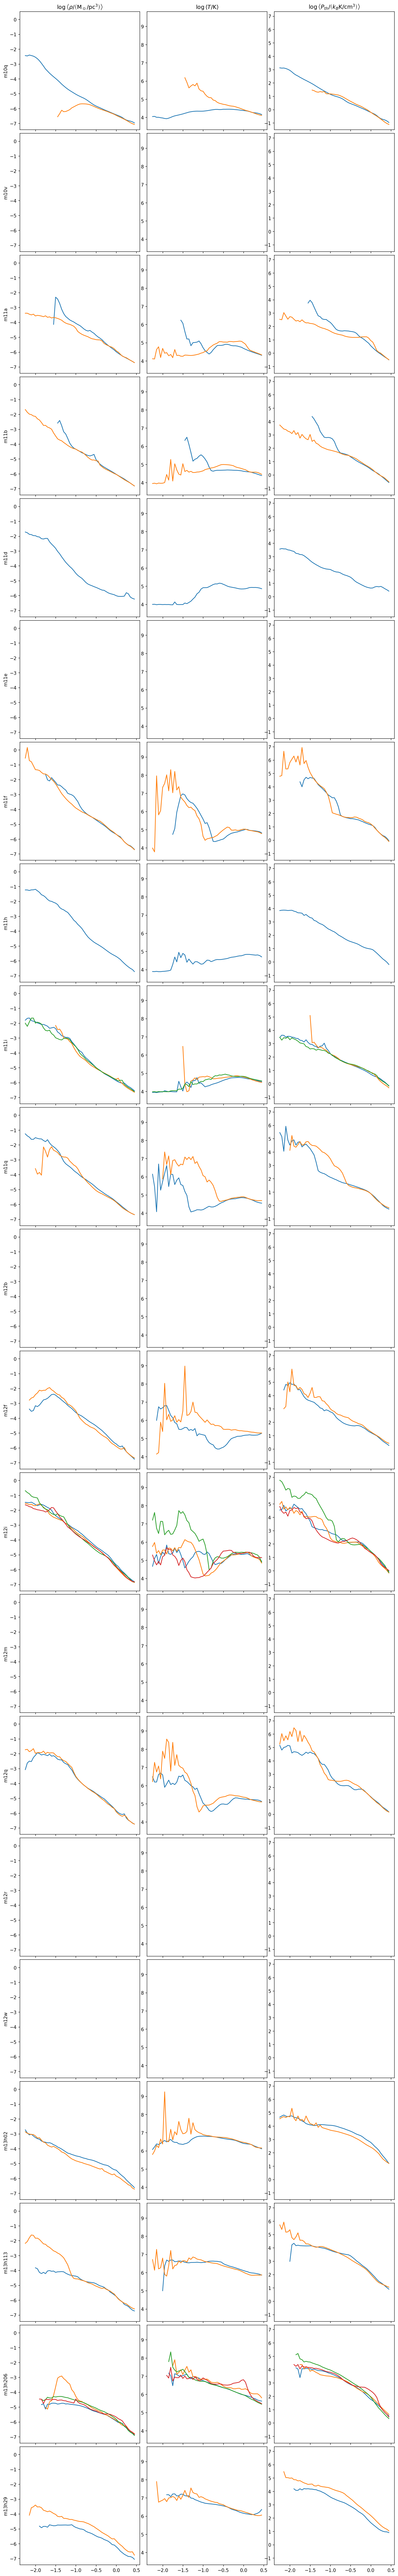

In [69]:
fig, axes = plt.subplots(len(np.unique(halo_names)), 3, sharex=True, sharey='col', gridspec_kw={'wspace': .06, 'hspace':.03}, figsize=[4.8*3,4.8*len(np.unique(halo_names))], dpi=150, facecolor='w')
for model_name, simname in fiducial_models.items():
    for m in model_match(simname, halos):
        if 'SnapNum045' in profiles[m]:
            ax = axes[list(np.unique(halo_names)).index(halo_names[m])]
            p = profiles[m]['SnapNum045']
            ax[0].plot(np.log10(p['rmid']), p['rho'], '-')
            ax[1].plot(np.log10(p['rmid']), p['T lin'], '-')
            ax[2].plot(np.log10(p['rmid']), p['P_th lin'], '-')
            if len(p['P_CR lin'])>0: ax[2].plot(np.log10(p['rmid']), p['P_CR lin'], '--')

axes[0,0].set_title( profilelabels['rho'] )
axes[0,1].set_title( profilelabels['T lin'] )
axes[0,2].set_title( profilelabels['P_th lin'] )

for i,hn in enumerate(np.unique(halo_names)):
    axes[i,0].set_ylabel(hn)